In [7]:
from diagrams import Diagram
from diagrams.programming.language import Python
from diagrams.generic.storage import Storage
from IPython import display

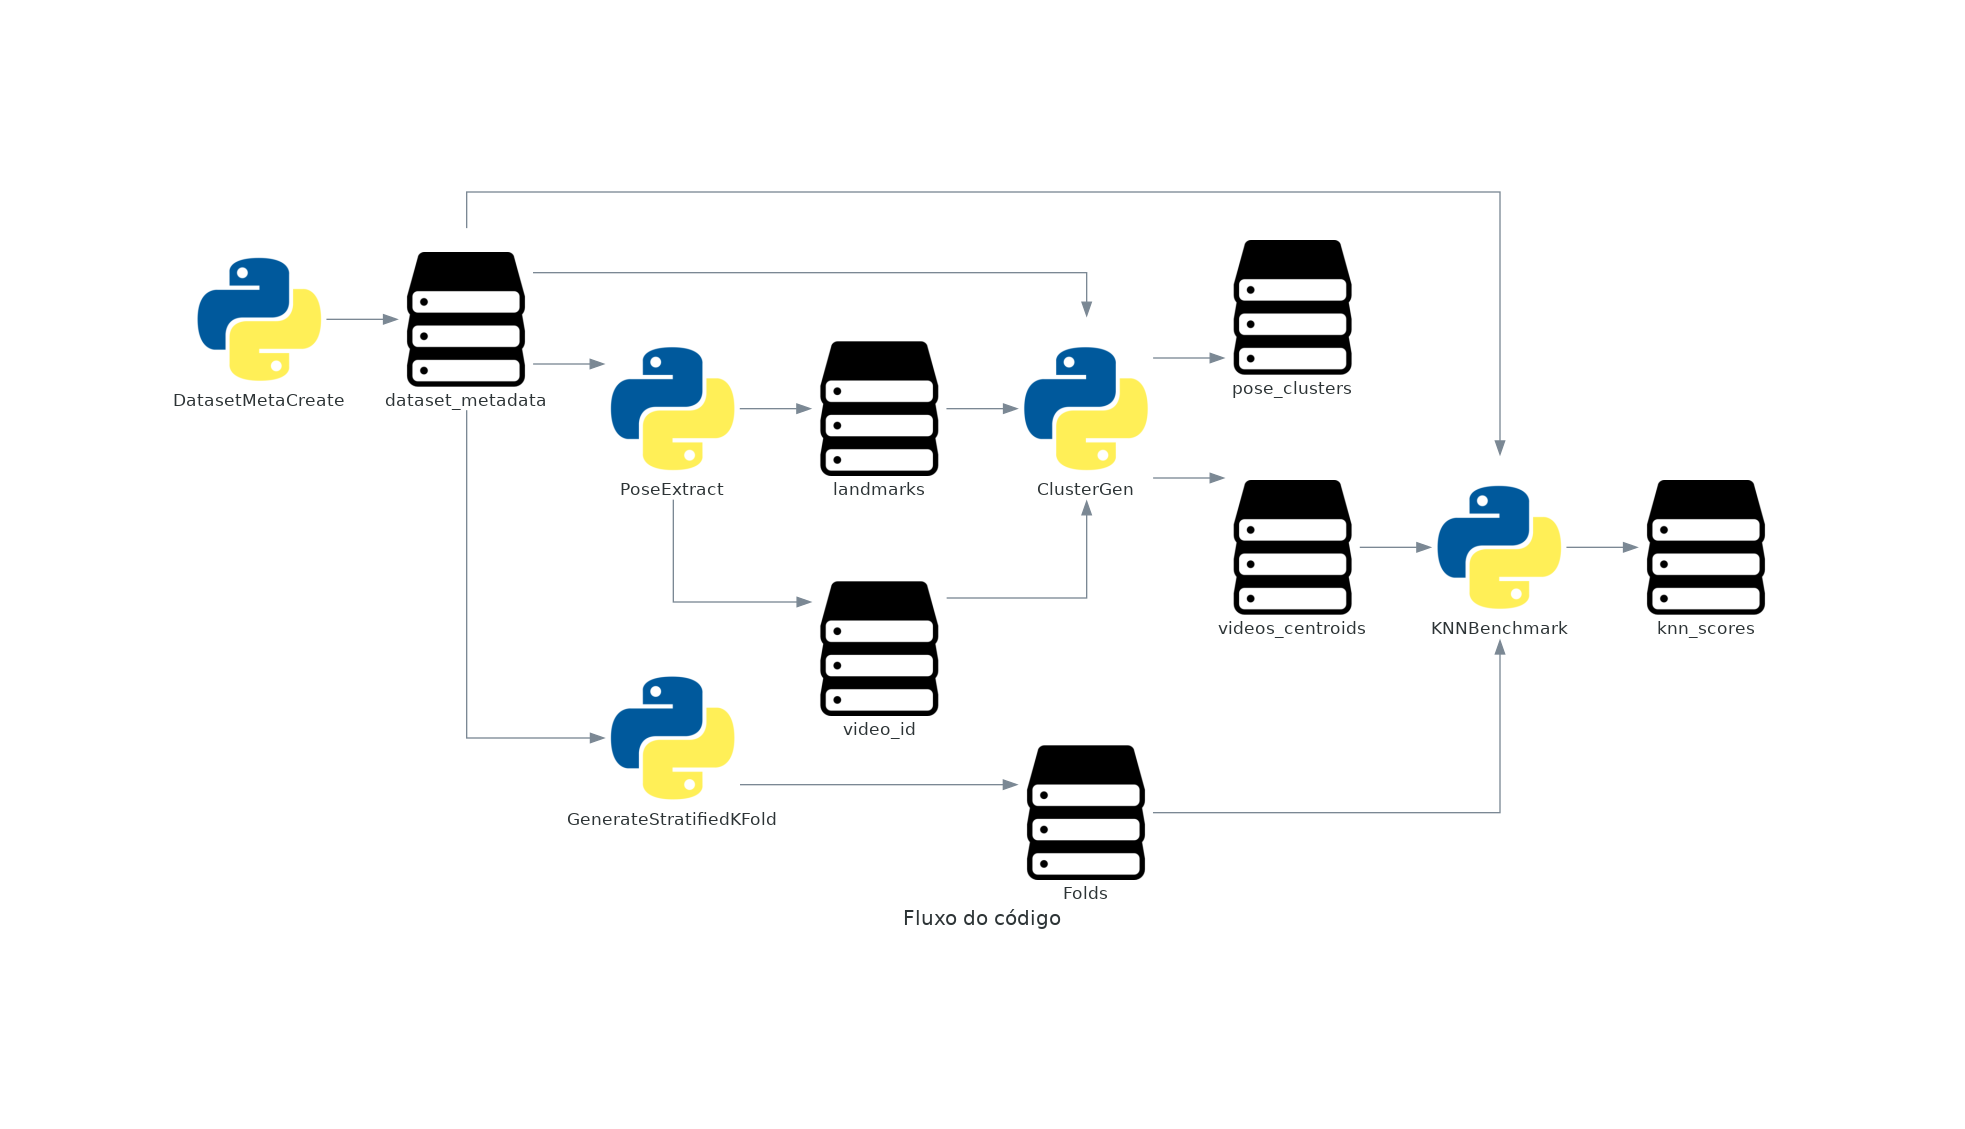

In [18]:
diagram_filename = 'Outs/FluxoDoCodigo'

with Diagram('Fluxo do código', show=False, outformat='png', filename=diagram_filename):
    dataset_metadata = Storage('dataset_metadata')
    video_id = Storage('video_id')
    landmarks = Storage('landmarks')
    videos_centroids = Storage('videos_centroids')
    folds = Storage('Folds')
    pose_clusters = Storage('pose_clusters')
    Python('DatasetMetaCreate') >> dataset_metadata >> Python('PoseExtract') >> [video_id, landmarks]
    dataset_metadata >> Python('GenerateStratifiedKFold') >> folds
    [dataset_metadata, video_id, landmarks] >> Python('ClusterGen') >> [videos_centroids, pose_clusters]
    [dataset_metadata, videos_centroids, folds] >> Python('KNNBenchmark') >> Storage('knn_scores')
display.Image(f'{diagram_filename}.png')

O `DatasetMetaCreate` gera o dataframe `dataset_metadata` com a localização de cada imagem, e seu dados, como gesto e sinalizador, que é lido pelo `PoseExtract` que extrai as posições usando a lib [mediapipe](https://developers.google.com/mediapipe) e gerando o dataset com a movimentação de cada vídeo, e qual vídeo ele se refere.